# Project | Credit Amount

* **Objective**
Project to explore, analyze and generate a report of the main findings for conceding credit to customers.

## Imports

In [13]:
# Data wrangling
import pandas as pd
import numpy as np

# Dataviz
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Statistics
import scipy.stats as scs

# Dataset
from ucimlrepo import fetch_ucirepo 

## Fetch Data

In [5]:
# fetch dataset 
statlog_german_credit_data = fetch_ucirepo(id=144) 
  
# data (as pandas dataframes)  X and y
X = statlog_german_credit_data.data.features 
y = statlog_german_credit_data.data.targets 

In [6]:
# Make it a data frame for easier manipulation
df = pd.concat([X,y], axis=1)

# Rename columns according to the documentation
df.columns = ['is_customer', 'duration_mths', 'credit_hist', 'purpose', 'credit_amt', 'savings', 'employed', 'installment_rate_pct',
              'sex_status', 'guarantors', 'same_resid_since', 'property', 'age', 'other_installment_plans', 'housing', 'n_credits_this_bank',
              'job', 'dependents', 'phone', 'foreign_worker', 'target']

# dataset information 
print(f'Data shape (rows,cols): {df.shape}')
print('---')
print(f'There are --{df.isna().sum().sum()}-- missing values in the dataset.')
print('---')
df.info()



Data shape (rows,cols): (1000, 21)
---
There are --0-- missing values in the dataset.
---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   is_customer              1000 non-null   object
 1   duration_mths            1000 non-null   int64 
 2   credit_hist              1000 non-null   object
 3   purpose                  1000 non-null   object
 4   credit_amt               1000 non-null   int64 
 5   savings                  1000 non-null   object
 6   employed                 1000 non-null   object
 7   installment_rate_pct     1000 non-null   int64 
 8   sex_status               1000 non-null   object
 9   guarantors               1000 non-null   object
 10  same_resid_since         1000 non-null   int64 
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  othe

## Data Decoding
Let's decode the data, so we can extract business insights from it. This decoding is not needed for modeling purposes, though.

In [7]:
# Attribute 1
a1 = {
    'A11': '<0',
	'A12': '0 - 200k',
	'A13': '>= 200k',
    'A14': 'no checking account'
    }

# Attribute 3
a3 = {
    'A30':'no credits taken/ all paid',
    'A31':'this bank all paid',
	'A32':'exist paid till now',
    'A33':'delay in paying off in the past',
	'A34':'critical account/  other credits existing (not at this bank)'
    }

# Attribute 4
a4 = {
    'A40': 'car (new)',
	'A41': 'car (used)',
	'A42': 'furniture/equipment',
	'A43': 'radio/television',
	'A44': 'domestic appliances',
	'A45': 'repairs',
	'A46': 'education',
	'A47': '(vacation - does not exist?)',
	'A48': 'retraining',
	'A49': 'business',
	'A410': 'others'
}

# Attribute 6
a6 = {
    'A61': '< 100k',
	'A62': '100k - 500k',
	'A63': '500k - 1M',
	'A64': '>= 1M',
    'A65': 'unknown/ no savings account'
}

# Attribute 7
a7 = {
    'A71': 'unemployed',
	'A72': '< 1 year',
	'A73': '1 - 4 years  ',
	'A74': '4 - 7 years',
	'A75': '>= 7 years'
    }

# Attribute 9
a9 = {
    'A91': 'male:divorced/separated',
	'A92': 'female:divorced/separated/married',
	'A93': 'male:single',
	'A94': 'male:married/widowed',
	'A95': 'female:single'
}

# Attribute 10
a10 = {
    'A101' : 'none',
	'A102' : 'co-applicant',
	'A103' : 'guarantor'
}

# Attribute 12
a12 = {
    'A121' : 'real estate',
	'A122' : 'if not A121 : building society savings agreement/ life insurance',
    'A123' : 'if not A121/A122 : car or other, not in attribute 6',
	'A124' : 'unknown / no property'
}

# Attribute 14
a14 = {
	'A141': 'bank',
	'A142': 'stores',
	'A143': 'none'
}

# Attribute 15
a15 = {
    'A151': 'rent',
	'A152': 'own',
	'A153': 'for free'
}

# Attribute 17
a17 = {
    'A171':'unemployed/ unskilled  - non-resident',
	'A172':'unskilled - resident',
	'A173':'skilled employee / official',
	'A174':'management/ self-employed/ highly qualified employee/ officer'
}

# Attribute 19
a19 = {
    'A191': 'no',
	'A192': 'yes'
}

# Attribute 20
a20 = {
    'A201': 'yes',
	'A202': 'no'
}

# Target 1 = Good, 2 = Bad.
# mapping as 0: Bad, 1: Good
tgt = {
    1: 1,
    2: 0
}

# Function to Apply decoding
def decoder(col_to_map, mapping):
    '''Function to apply the mapping for a column'''
    return df[col_to_map].map(mapping)



In [8]:
# Columns to map
cols_to_map = ['is_customer', 'credit_hist', 'purpose','savings', 'employed', 'sex_status','guarantors', 'property',
               'other_installment_plans', 'housing', 'job','phone', 'foreign_worker', 'target']

# mappings
mappings = [a1, a3, a4, a6, a7, a9, a10, a12, a14, a15, a17, a19, a20, tgt]

# Decode
for col, mapping in zip(cols_to_map, mappings):
    df[col] = decoder(col_to_map= col,
                      mapping = mapping)

# View
df.sample(1)

,is_customer,duration_mths,credit_hist,purpose,credit_amt,savings,employed,installment_rate_pct,sex_status,guarantors,...,property,age,other_installment_plans,housing,n_credits_this_bank,job,dependents,phone,foreign_worker,target
938,0 - 200k,60,exist paid till now,education,6288,< 100k,1 - 4 years,4,male:single,none,...,unknown / no property,42,none,for free,1,skilled employee / official,1,no,yes,0


In [9]:
# Save file
df.to_csv('../.data/credits.csv', index=False)

## Exploratory Analysis
Next, we will explore the data to get valuable insights that can help the business and help the modeling on the next phase.

In [74]:
# Statistical description
df.describe(include='all').T.fillna('*')

C:\Users\gurez\AppData\Local\Temp\ipykernel_58040\1929319527.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.describe(include='all').T.fillna('*')


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
is_customer,1000.0,4,no checking account,394,*,*,*,*,*,*,*
duration_mths,1000.0,*,*,*,20.903,12.058814,4.0,12.0,18.0,24.0,72.0
credit_hist,1000.0,5,exist paid till now,530,*,*,*,*,*,*,*
purpose,1000.0,10,radio/television,280,*,*,*,*,*,*,*
credit_amt,1000.0,*,*,*,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
savings,1000.0,5,< 100k,603,*,*,*,*,*,*,*
employed,1000.0,5,1 - 4 years,339,*,*,*,*,*,*,*
installment_rate_pct,1000.0,*,*,*,2.973,1.118715,1.0,2.0,3.0,4.0,4.0
sex_status,1000.0,4,male:single,548,*,*,*,*,*,*,*
guarantors,1000.0,3,none,907,*,*,*,*,*,*,*


**Insights**
* Approximately 40% of the customers are not customers of the bank.
* Median age of the account with the bank is 18 months.
* More than half (53%) of the aplicants have other credit lines that are being paid without delay.
* The median credit line is about *2.4k dollars*.
* The average rate us 3% of interest.
* Average age is around 35 years old.
* 63% are skilled workers.
* 81% don't have other installments to pay.
* 96% are foreign workers.


The first model we want to create for this project is a regression model to predict the credit amount.<br>
Thus, we will use the credit amount as the target variable and the other features as predictors.<br>
Let us start by checking the correlation between the features and the target variable.

In [10]:
# Correlation matrix
correlation = df.select_dtypes('number').corr()

# plot correlation matrix
correlation.style.background_gradient(cmap='coolwarm')

,duration_mths,credit_amt,installment_rate_pct,same_resid_since,age,n_credits_this_bank,dependents,target
duration_mths,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834,-0.214927
credit_amt,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142,-0.154739
installment_rate_pct,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207,-0.072404
same_resid_since,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643,-0.002967
age,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201,0.091127
n_credits_this_bank,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667,0.045732
dependents,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000,0.003015
target,-0.214927,-0.154739,-0.072404,-0.002967,0.091127,0.045732,0.003015,1.000000


Only duration_mths have a medium to strong correlation with credit_amt.<br>
Next, we will check the credit amount by the categorical variables to see the differences by category.

In [11]:
# Function to plot the credit amount by categorical variables
def plot_cat_var(df, col):
    # Create figure with 2 subplots
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    # Create boxenplot and stripplot
    sns.boxenplot(x=col, y='credit_amt', data=df, ax=ax[0])
    sns.stripplot(x=col, y='credit_amt', alpha=0.3, data=df, ax=ax[0])
    plt.title(f'Credit Amount by {col}', size=15)

    # Create kdeplot
    for c in df[col].unique():
        sns.kdeplot(df.query(f'{col} == "{c}"')['credit_amt'], label=c, ax=ax[1])
    plt.legend()
    plt.show()


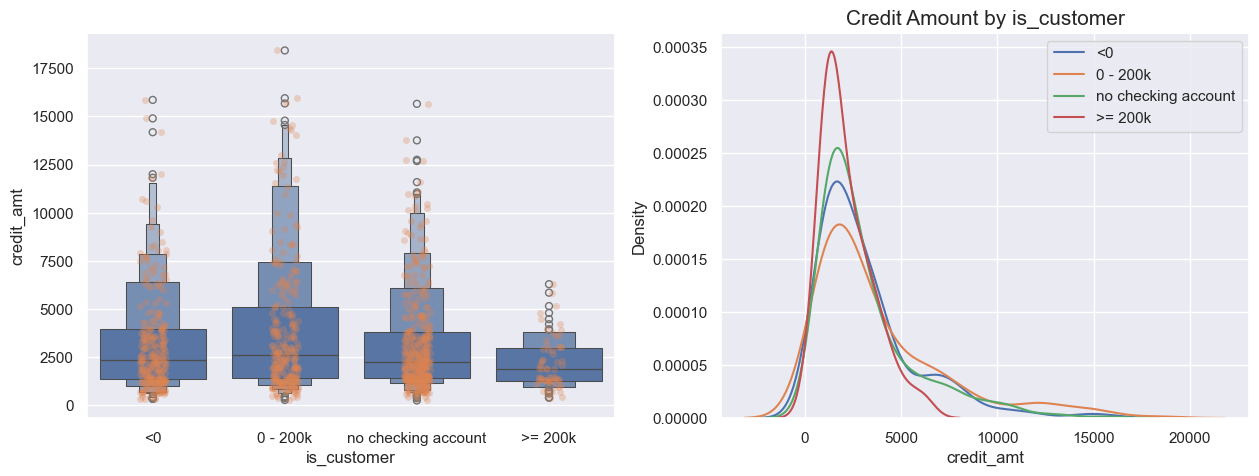

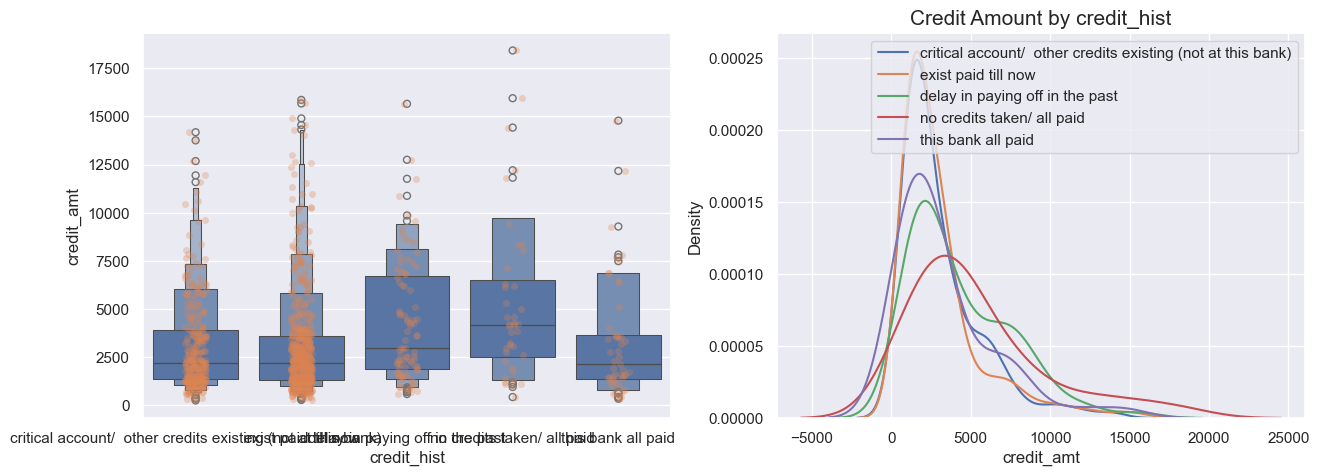

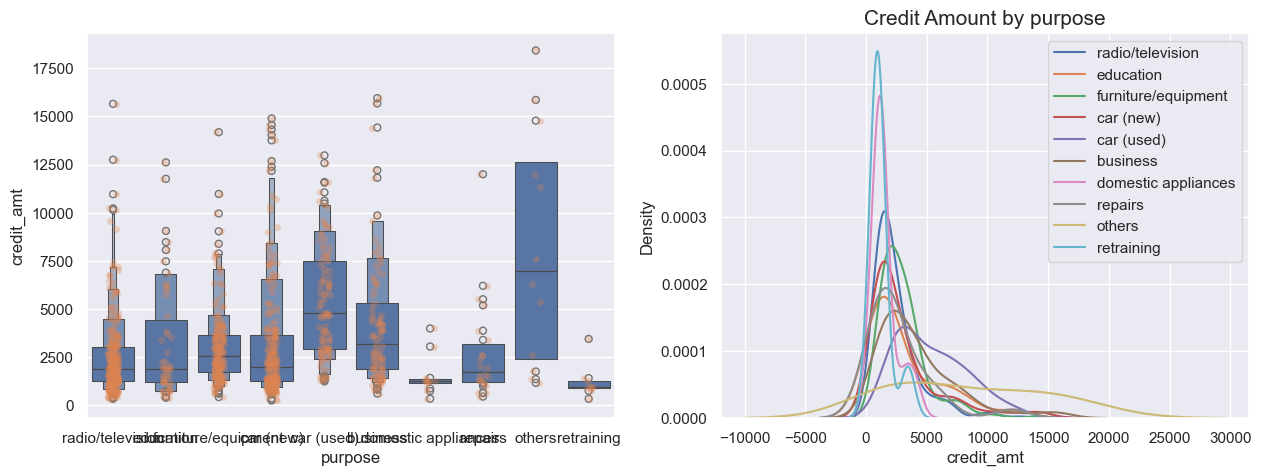

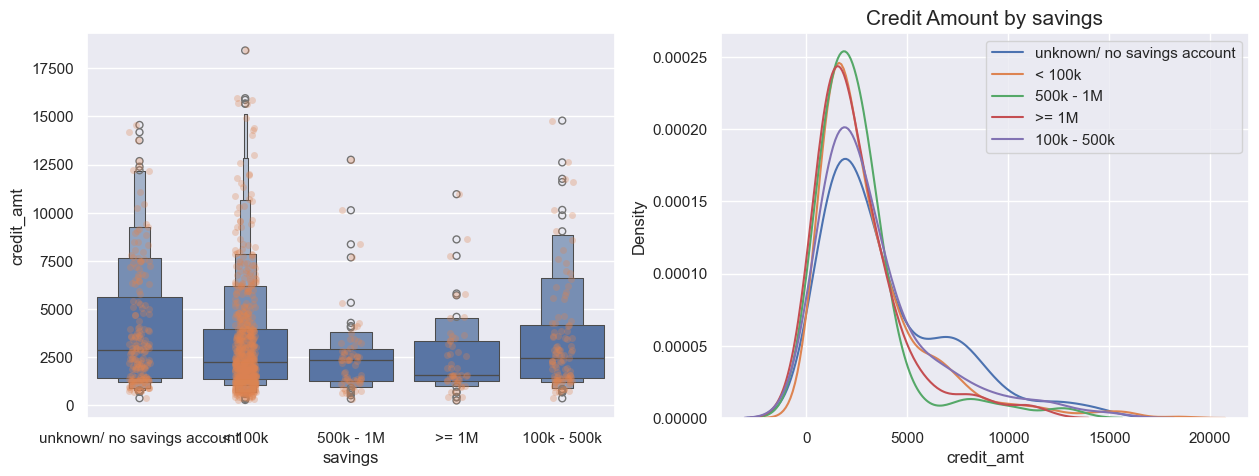

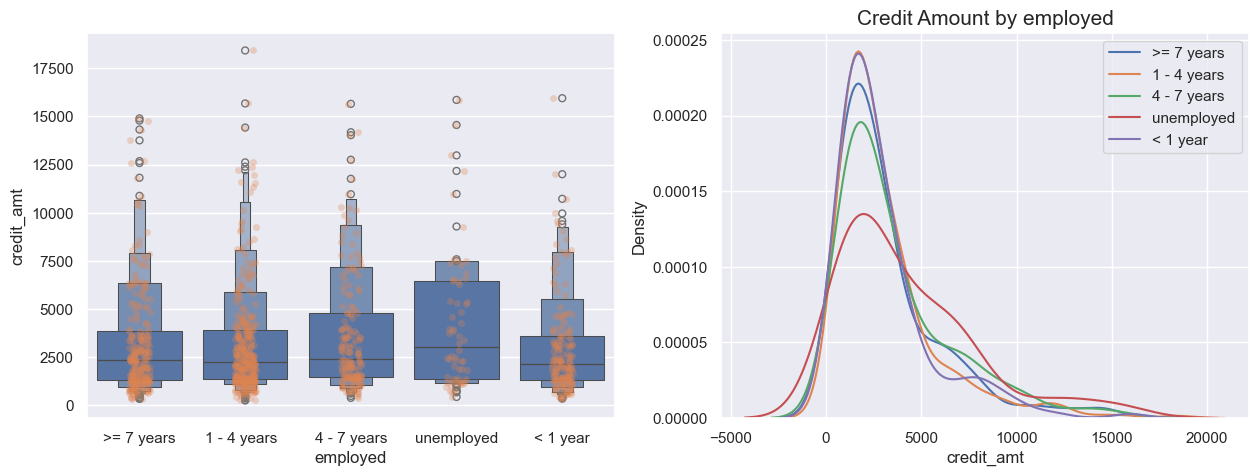

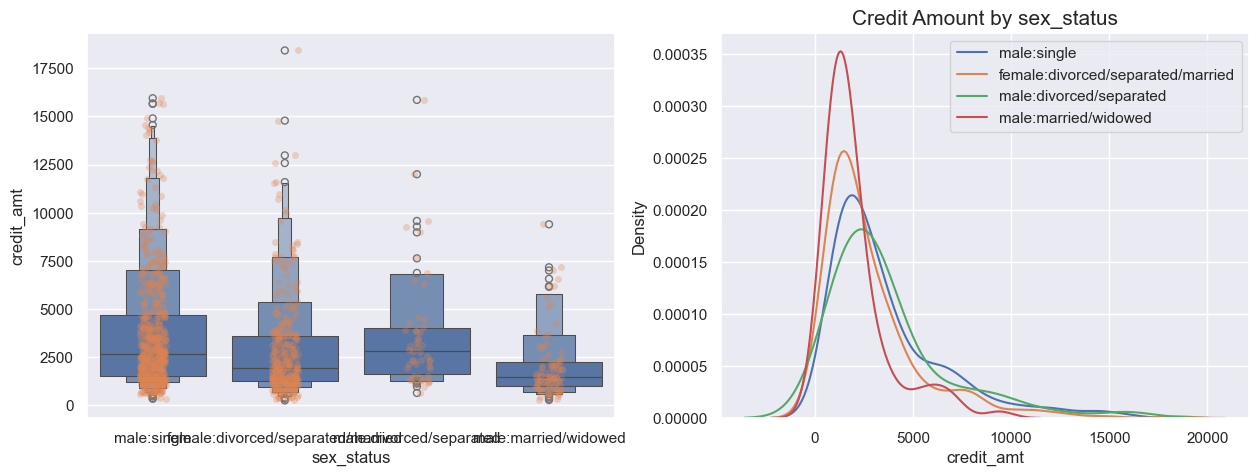

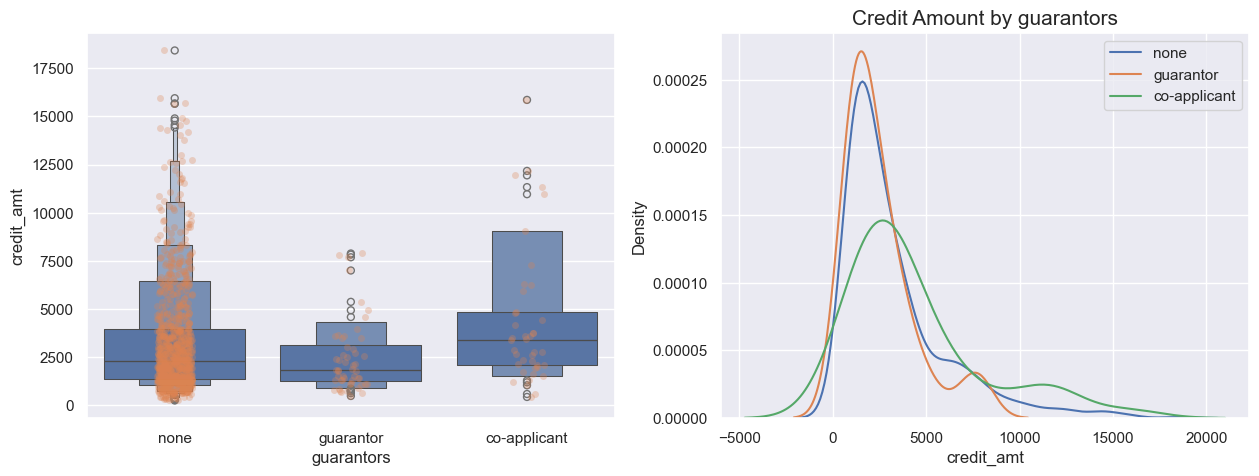

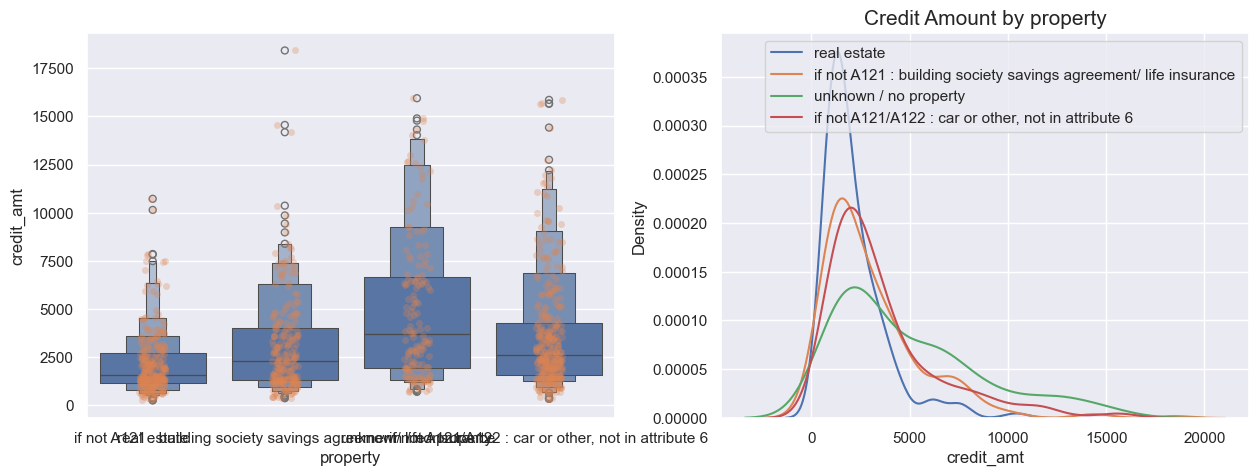

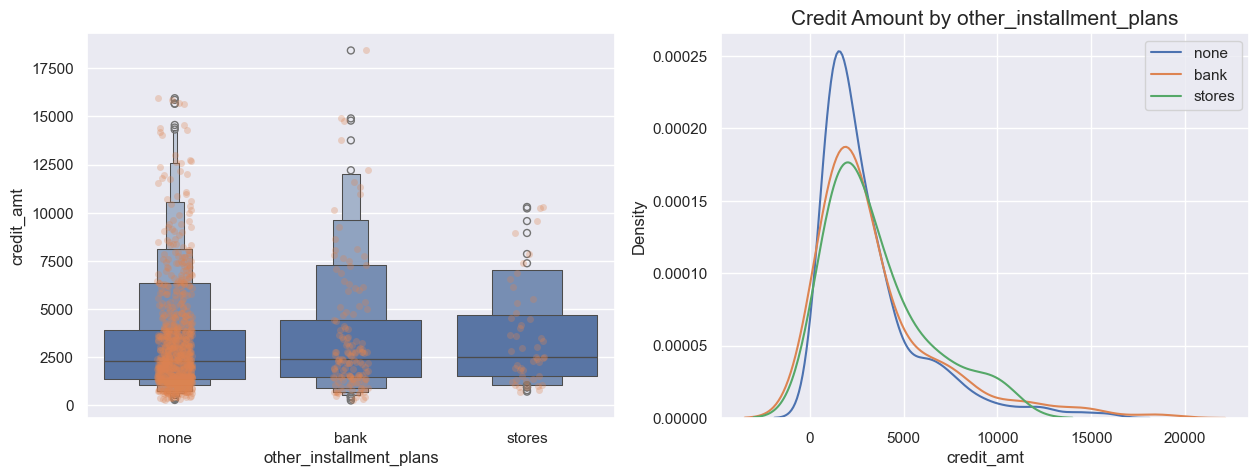

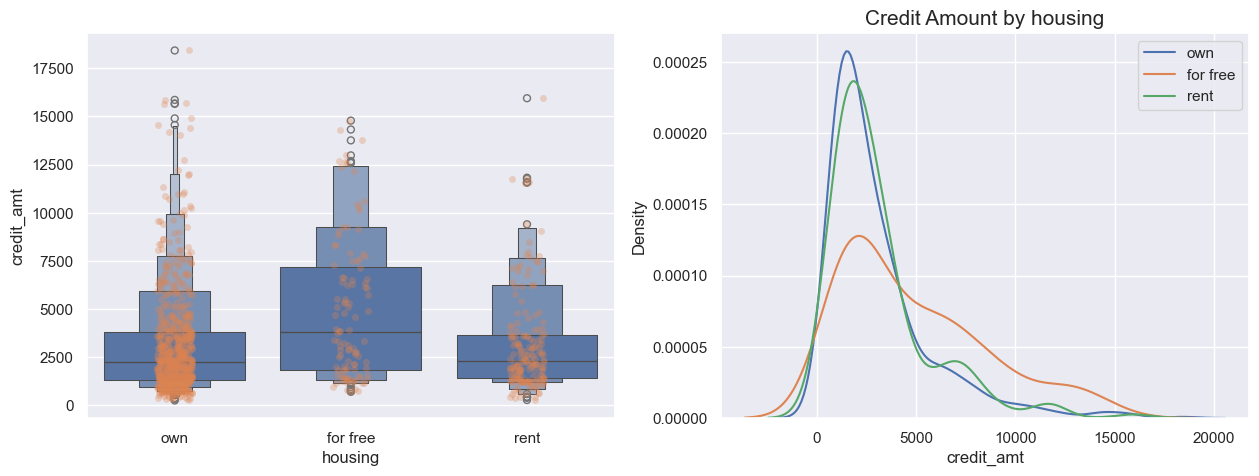

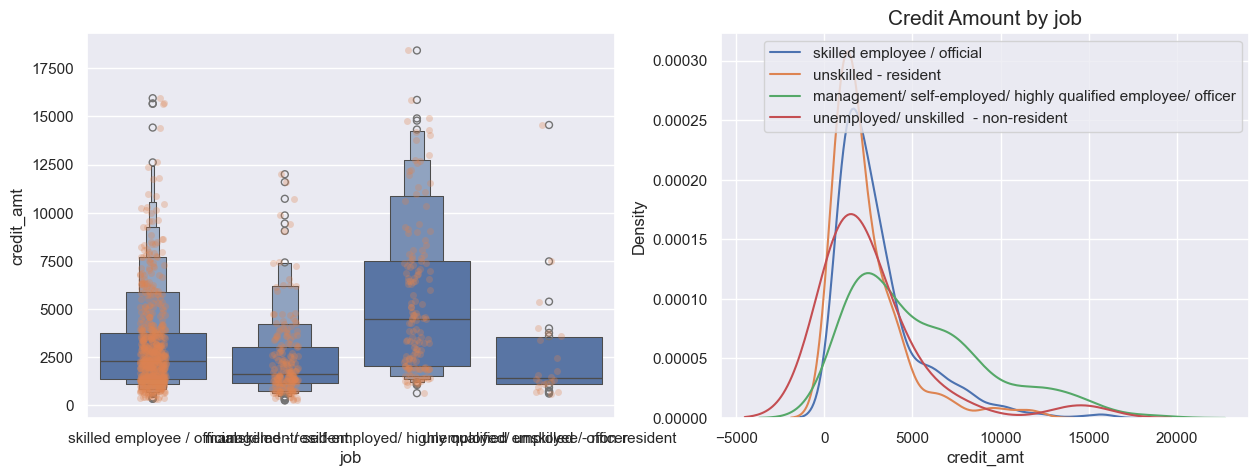

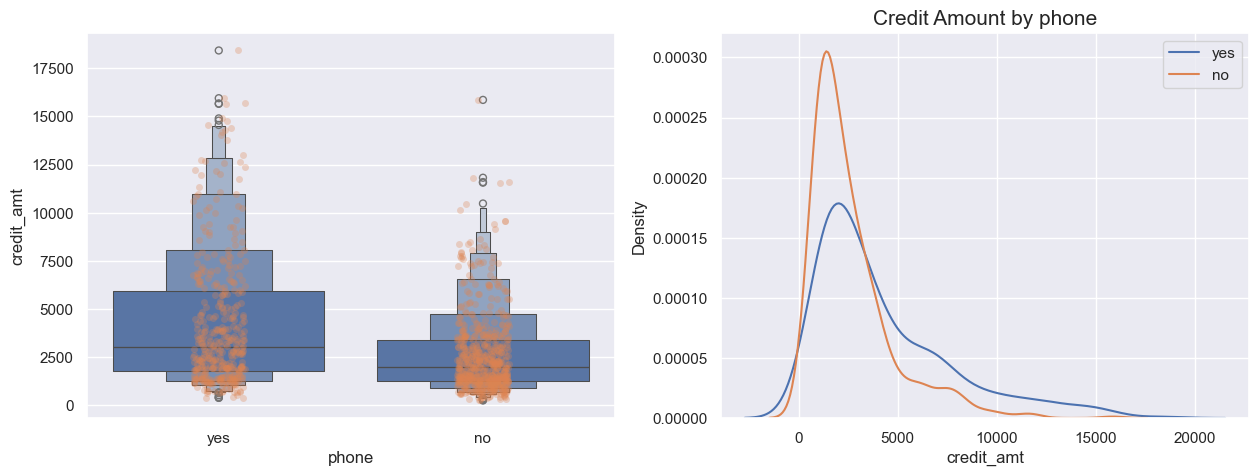

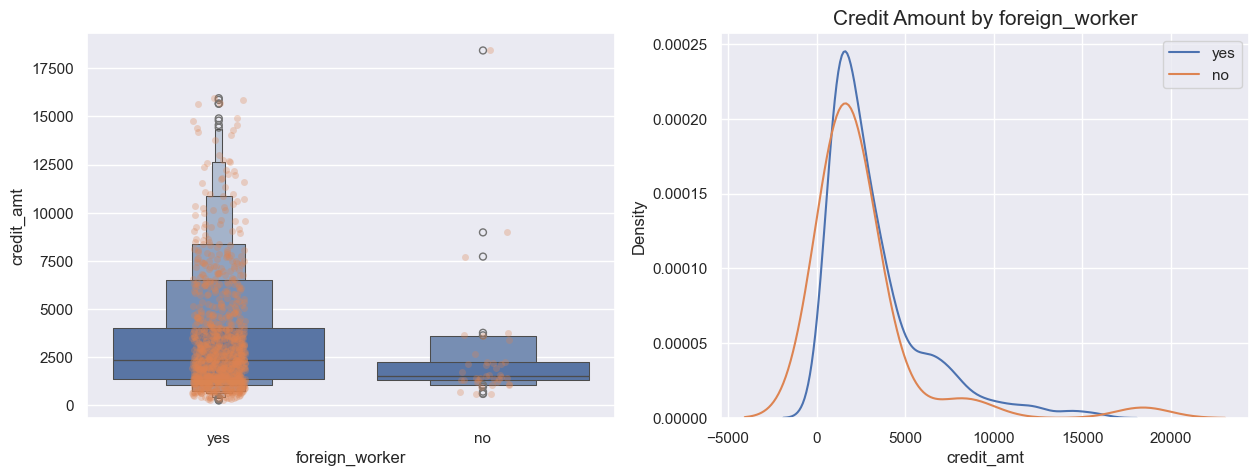

In [14]:
# Plotting credit amount by categorical variables
for col in df.select_dtypes('object').columns:
    plot_cat_var(df, col)

The plots show that the credit amount varies mostly for `credit_hist`, `purpose`, `savings`, `sex_status`, `guarantors`, `property`, `housing`, `job`, and `phone`. <br>
This indicates that the categorical variables have a better chance to be important for predicting the credit amount.<br>
Next, we will start preparing our data for modeling.

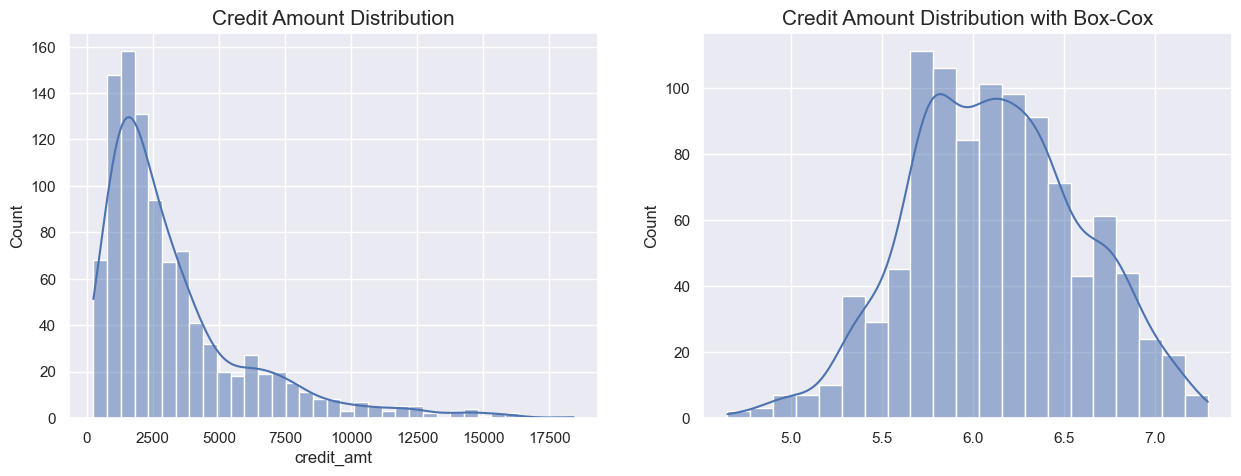

In [24]:
# Create figure
plt.figure(figsize=(15,5))

# Check the distribution of the target variable
plt.subplot(1,2,1)
g1 = sns.histplot(df['credit_amt'], kde=True)
g1.set_title('Credit Amount Distribution', size=15)

plt.subplot(1,2,2)
g2 = sns.histplot(scs.boxcox(df['credit_amt'])[0], kde=True)
g2.set_title('Credit Amount Distribution with Box-Cox', size=15)
plt.show()


In [26]:
# Checking for normality of the target variable `credit_amt`
print('** Check normality for the original distribution:')
print(scs.shapiro(df['credit_amt']))
print('\n---\n')

# Checking for Normality after Box-Cox transformation
print('** Check normality for the transformed distribution:')
print(scs.shapiro(scs.boxcox(df['credit_amt'])[0]))

** Check normality for the original distribution:
ShapiroResult(statistic=np.float64(0.7933961638083256), pvalue=np.float64(8.608545621331088e-34))

---

** Check normality for the transformed distribution:
ShapiroResult(statistic=np.float64(0.994295610968471), pvalue=np.float64(0.0007607681859415512))


We get an **approximate normality** with the Box-Cox transformation